#  <font color="green"> <b>Document Image Classification <font>

### <font color="green"> <b>Problem Statement</b>
Given a document image, we need to classify the image into a category ( numbered 0 to 15 ) using the features learned by deep convolutional neural networks (CNNs).

### <font color="green"> <b>Dataset Detail</b>
  The RVL-CDIP (Ryerson Vision Lab Complex Document Information Processing) dataset consists of 400,000 grayscale images in 16 classes, with 25,000 images per class. There are 320,000 training images, 40,000 validation images, and 40,000 test images. The images are sized so their largest dimension does not exceed 1000 pixels.
  The label files list the images and their categories in the following format:
path/to/the/image.tif category

where the categories are numbered 0 to 15, in the following order:
0.   letter
1.   form
2.   email
3.   handwritten
4.   advertisement
5.   scientific report
6.   scientific publication
7.   specification
8.   file folder
9.   news article
10.   budget
11.   invoice
12.   presentation
13.   questionnaire
14.   resume
15.   memo

  


### <font color="green"> <b> Mapping the Problem </b>
  The problem we are trying to solve is the supervised learning problem because we need to classify the given document into the known output space. 

### <font color="green"> <b> Key Performance metric </b>  
- The probability of classification is accurate as possible. Thus, we use multi-class log-loss
- For deep inspection of the classification, we use a Confusion matrix

### <font color="green"> <b> Business Constraints </b>  
- No such low latency required like internet applications
- It should be fast enough to produce the desired result

### <font color="green"> <b>Review of Document Image Classification using Deep CNN</b>  
  The paper presents the idea for automating document image and retrieval classification by
leveraging the power of deep Convolution Neural Network (CNN). CNN is the current state
of the art technique to learn the hierarchical chain of abstraction from pixel inputs to concise
and descriptive representations. <br>
There is much research work that happened in the past for document image analysis. There
is a rigid structure in the document, which can be helpful in the document classification.
However, this approach has tightly bound to the structure of the template and equivalent to
a template matching problem. Also, this approach is limited to the documents which have
a fixed design.<br>
An alternative strategy is to treat document images holistically, or at least in vast regions,
and search for discriminative landmark features that may appear anywhere in the document.
This strategy is sometimes called a ”bag of visual words”. The advantage of holistic analysis
is that the resulting representation of documents is invariant to the geometric configuration
of the features.<br>
There have been attempts to bridge the gap between region-based and holistic analyses.
By concatenating image features pooled at several stages, beginning with a whole-image
pool and proceeding into smaller and smaller regions, it is possible to build a descriptor
that contains both global and local layout characteristics. This technique, known as spatial
pyramid matching. <br>
In structured documents, the layout of text and graphics elements often reflect essential
information about the genre. The genre of the document is present in different regions of the
document. For classifying or retrieval of the documents, we need to find these genres in the
specified regions. Therefore, documents of a category often share region-specific features.<br>
The paper follows two approaches to find the genre of the documents; the first one is to
find the features from the document using single holistic CNN, and the second is to find
the highlights from regions using the region-specific CNN and concatenating these features.
There are few places in the documents where the information is rich like header, left body,
right body, and footer.<br>
The holistic CNN may not take advantage of the region-specific information, and this ap-proach is more of the coarse grain approach. Whereas the region-specific CNN is taking
advantage of the region-specific information, this approach is more of the fine-grain method.
The key idea in the ensemble CNN is to learn the region-specific information independently.<br>
A document can have many regions. However, few regions are very information-rich like
header, left body, right body, and footer. Thus, in this work, a total of five CNNs are used.
Four of these are region-tuned, placed at the header, left body, right body, and footer of the
document images. The fifth is a holistic CNN, trained on the entire images. <br>
All the images resized to 780 * 600 to generic the dimensions of the dataset. The header
region describes in the first 256 rows of pixels in each image. The footer region describes
in the last 256 rows of pixels in each image. The left body region was delineated by the
intersection of the 400 central rows and the 300 remaining columns; the right body region
was symmetrically defined. Every extracted region was resized to 227 * 227 before being
used as input. Before building the network, the weights need to be initialized. There are two
ways to initialize the weights first one is to initialize all the weights to zero, and the second
one is to use the weights from the pre-trained network and fine-tune them while training.<br>
A popular choice for pre-training is the ILSVRC 2012 ImageNet challenge. Features ex-
tracted from an ImageNet-trained network are compelling general-purpose features in a
variety of other vision challenge. The result shows that the ensemble CNN out perform with
all the available techniques.<br>
*The idea can be extended further to improve performance. Each region-specific CNN contains
some information based on this information; the classification takes place. However, there
are certain regions where the information is more important than other regions like headers
have more information compared to other regions. The regions which carry more information
are advantageous in the classification. We can leverage this fact by giving weights to each
region based on the information the region has. By doing this, we can extend the control
of overfitting and underfitting at one more level. Also, we can use some popular CNN
architecture like VGG 16 and AlexNet to increase the performance.*

##### <font color="green"><b>Importing Libraries</b>

In [0]:
from google.colab import drive
import shutil
import pandas as pd
import os
import numpy as np
import csv
import tensorflow as tf
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Input, BatchNormalization, Dropout, Dense, GlobalAvgPool2D, GlobalMaxPooling2D, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, Adagrad, SGD
from keras.optimizers import Adam, RMSprop, Adagrad, SGD

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.models import Model, load_model, model_from_json
from sklearn.metrics import classification_report, confusion_matrix
from keras.applications.vgg16 import VGG16
import cv2
from keras.utils import plot_model
import pydot_ng as pydot
from IPython.display import Image
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential


Using TensorFlow backend.


In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##### <font color="green"><b>Loading Dataset</b>

In [0]:
!wget --header="Host: doc-0k-9s-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.80 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://docs.google.com/uc?id=0Bz1dfcnrpXM-MUt4cHNzUEFXcmc&export=download" --header="Cookie: AUTH_09hrsicn70qo8t99e99dcilq5peva3q4_nonce=ood696ab6fbpm" --header="Connection: keep-alive" "https://doc-0k-9s-docs.googleusercontent.com/docs/securesc/1ovto70s8o57pgu4jpq11bv0fsg5d9em/ue8i1t80v1tei0u8fic6qcb8a83oieve/1574920800000/18137660436632322230/04258284700297384478/0Bz1dfcnrpXM-MUt4cHNzUEFXcmc?e=download&authuser=2&nonce=ood696ab6fbpm&user=04258284700297384478&hash=ijikdn996d4e6ck7s03r0jggo0bnnt7s" -O "rvl-cdip.tar.gz" -c

--2019-11-28 07:59:06--  https://doc-0k-9s-docs.googleusercontent.com/docs/securesc/1ovto70s8o57pgu4jpq11bv0fsg5d9em/ue8i1t80v1tei0u8fic6qcb8a83oieve/1574920800000/18137660436632322230/04258284700297384478/0Bz1dfcnrpXM-MUt4cHNzUEFXcmc?e=download&authuser=2&nonce=ood696ab6fbpm&user=04258284700297384478&hash=ijikdn996d4e6ck7s03r0jggo0bnnt7s
Resolving doc-0k-9s-docs.googleusercontent.com (doc-0k-9s-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-0k-9s-docs.googleusercontent.com (doc-0k-9s-docs.googleusercontent.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘rvl-cdip.tar.gz’

rvl-cdip.tar.gz         [           <=>      ]  36.10G  69.7MB/s    in 9m 18s  

2019-11-28 08:08:25 (66.3 MB/s) - ‘rvl-cdip.tar.gz’ saved [38762320458]



In [0]:
shutil.unpack_archive('rvl-cdip.tar.gz','data')

In [0]:
txtfile = r"data/labels/train.txt"
csvfile = r"train.csv"
with open(txtfile, 'r') as infile, open(csvfile, 'w') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        writer = csv.writer(outfile)
        writer.writerows(lines)
        
#Loading data
df=pd.read_csv("train.csv",header=None)
df.head()

,0
0,imagesq/q/o/c/qoc54c00/80035521.tif 15
1,imagese/e/w/c/ewc23d00/513280028.tif 1
2,imagesw/w/b/t/wbt26e00/2053453161.tif 7
3,imagesm/m/k/m/mkm05e00/2040792992_2040792994.t...
4,imageso/o/e/x/oex80d00/522787731+-7732.tif 3


In [0]:
df.shape

(320000, 1)

In [0]:
#naming columns in data
df.columns=['image']

#Splitting the column into 2 columns image and class using space ' ' as delimiter
df = pd.DataFrame(df['image'].str.split(' ',1).tolist(),
                                   columns = ['image','class'])
df.head()

,image,class
0,imagesq/q/o/c/qoc54c00/80035521.tif,15
1,imagese/e/w/c/ewc23d00/513280028.tif,1
2,imagesw/w/b/t/wbt26e00/2053453161.tif,7
3,imagesm/m/k/m/mkm05e00/2040792992_2040792994.tif,10
4,imageso/o/e/x/oex80d00/522787731+-7732.tif,3


In [0]:
txtfile = r"data/labels/test.txt"
csvfile = r"test.csv"
with open(txtfile, 'r') as infile, open(csvfile, 'w') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        writer = csv.writer(outfile)
        writer.writerows(lines)
        
#Loading data
test=pd.read_csv('test.csv',header=None)


#naming columns
test.columns=['image']

#Splitting column into 2 columns using space ' ' as delimiter
df_test = pd.DataFrame(test['image'].str.split(' ',1).tolist(),
                                   columns = ['image','class'])
df_test.head()

,image,class
0,imagesr/r/g/e/rge31d00/503210033+-0034.tif,3
1,imagesc/c/e/j/cej80d00/517306722+-6724.tif,3
2,imagesm/m/r/r/mrr36d00/50603620-3621.tif,14
3,imagesg/g/t/u/gtu29c00/2084573574a.tif,2
4,imagesh/h/o/f/hof08d00/2071783492.tif,9


In [0]:
df_test.shape

(40000, 2)

In [0]:
#chaning datatypes for easy use
df['image'] = df['image'].astype(str)
df['class']=df['class'].astype(int)
df_test['image'] = df_test['image'].astype(str)
df_test['class']=df_test['class'].astype(int)

##### <font color="green"> <b> A BASIC EDA</b> 

In [0]:
countofclass = sorted(dict(Counter(df['class'])).items())

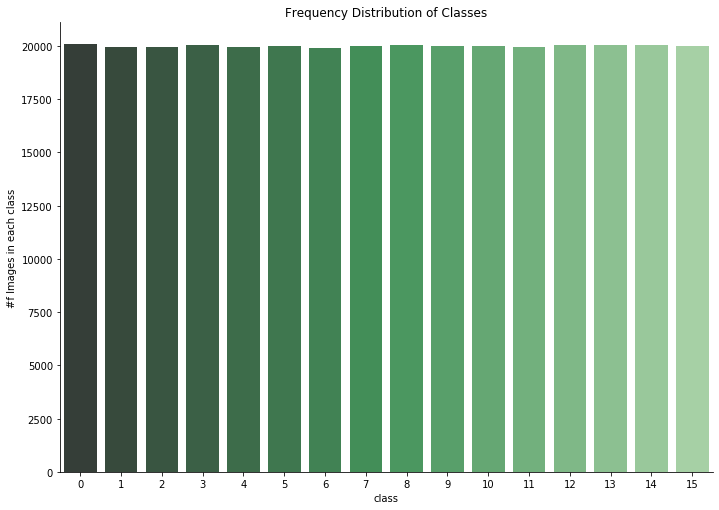

In [0]:
sns.set_style()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x = [i[0] for i in countofclass], y = [i[1] for i in countofclass], palette="Greens_d")
ax = ax.axes
ax.set(xlabel='class', ylabel = "#f Images in each class", title = "Frequency Distribution of Classes")
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

In [0]:
print(df.loc[0]['image'])

imagesq/q/o/c/qoc54c00/80035521.tif


##### <b> A Sample Image </b>

 heightof Image is **  1000
 width of Image is **  754


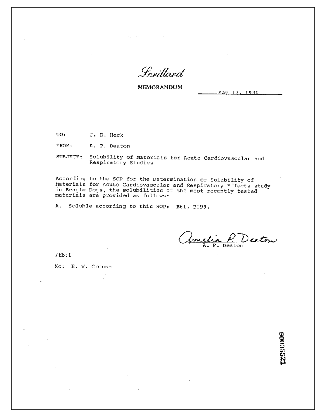

In [0]:
image = df.loc[0]['image']
path = ("/content/data/images/" +image)
img = cv2.imread(path)
print(" heightof Image is ** ",(img.shape[0]))
print(" width of Image is ** ",(img.shape[1]))
plt.figure(figsize=(14,7.4))
plt.grid()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()



##### Conclusion: <br>
The dataset is the balanced dataset as seen in the bar graph of frequency distribution of class labels. 

**Train Set**

In [0]:
txtfile = r"data/labels/train.txt"
csvfile = r"train.csv"
with open(txtfile, 'r') as infile, open(csvfile, 'w') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        writer = csv.writer(outfile)
        writer.writerows(lines)
        
#Loading data
df=pd.read_csv("train.csv",header=None)
df.head()

,0
0,imagesq/q/o/c/qoc54c00/80035521.tif 15
1,imagese/e/w/c/ewc23d00/513280028.tif 1
2,imagesw/w/b/t/wbt26e00/2053453161.tif 7
3,imagesm/m/k/m/mkm05e00/2040792992_2040792994.t...
4,imageso/o/e/x/oex80d00/522787731+-7732.tif 3


In [0]:
#naming columns in data
df.columns=['image']

#Splitting the column into 2 columns image and class using space ' ' as delimiter
df = pd.DataFrame(df['image'].str.split(' ',1).tolist(),
                                   columns = ['image','class'])
df.head()

,image,class
0,imagesq/q/o/c/qoc54c00/80035521.tif,15
1,imagese/e/w/c/ewc23d00/513280028.tif,1
2,imagesw/w/b/t/wbt26e00/2053453161.tif,7
3,imagesm/m/k/m/mkm05e00/2040792992_2040792994.tif,10
4,imageso/o/e/x/oex80d00/522787731+-7732.tif,3


In [0]:
df.shape

(320000, 2)

In [0]:
#saving that to csv file
df.to_csv('train.csv')

In [0]:
#changing datatypes fpr easy use
df['image']=df['image'].astype(str)
df['class']=df['class'].astype(int)

In [0]:
os.chdir("data")

In [0]:
os.mkdir("train")

In [0]:
os.chdir("train")

In [0]:
for i in range(16):
    os.mkdir(str(i))

In [0]:
os.chdir("/content")

In [0]:
for i in range(len(df)):
    for j in range(16):
        if df['class'][i]==j:
            shutil.copy2('data/images/'+df['image'][i],'data/train/'+str(j) +'/')
        else:
            continue

In [0]:
#Renaming folder names for train set
class_name={'0':'letter','1':'form','2':'email','3':'handwritten','4':'advertisement','5':'scientific report','6':'scientific publication','7':'specification','8':'file folder','9':'news article','10':'budget','11':'invoice','12':'presentation','13':'questionnaire','14':'resume','15':'memo'}
path = 'data/train'

i = 0
for j in class_name.keys():
    os.rename(path+'/'+j, path+'/'+class_name[j])
    i=i+1

**Test Set**

In [0]:
txtfile = r"data/labels/test.txt"
csvfile = r"test.csv"
with open(txtfile, 'r') as infile, open(csvfile, 'w') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        writer = csv.writer(outfile)
        writer.writerows(lines)
        
#Loading data
test=pd.read_csv('test.csv',header=None)


#naming columns
test.columns=['image']

#Splitting column into 2 columns using space ' ' as delimiter
df_test = pd.DataFrame(test['image'].str.split(' ',1).tolist(),
                                   columns = ['image','class'])

#chaning datatypes for easy use
df_test['image']=df_test['image'].astype(str)
df_test['class']=df_test['class'].astype(int)

In [0]:
os.chdir("data")

In [0]:
os.mkdir("test")

In [0]:
os.chdir("test")

In [0]:
for i in range(16):
    os.mkdir(str(i))

In [0]:
os.chdir("/content")

In [0]:
#Pushin images into corresponding folders based on their class number


for i in range(len(df_test)):
    for j in range(16):
        if df_test['class'][i]==j:
            shutil.copy2('data/images/'+df_test['image'][i],'data/test/'+str(j) +'/')
        else:
            continue

In [0]:
#Renaming folder names for test set
class_name={'0':'letter','1':'form','2':'email','3':'handwritten','4':'advertisement','5':'scientific report','6':'scientific publication','7':'specification','8':'file folder','9':'news article','10':'budget','11':'invoice','12':'presentation','13':'questionnaire','14':'resume','15':'memo'}
path = 'data/test'

i = 0
for j in class_name.keys():
    os.rename(path+'/'+j, path+'/'+class_name[j])
    i=i+1

**Validation Set**

In [0]:
txtfile = r"data/labels/val.txt"
csvfile = r"validation.csv"
with open(txtfile, 'r') as infile, open(csvfile, 'w') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        writer = csv.writer(outfile)
        writer.writerows(lines)
        
#Loading data
val=pd.read_csv('validation.csv',header=None)

#Renaming columns
val.columns=['image']

#Splitting column into 2 columns using space ' ' as delimiter
df_val = pd.DataFrame(val['image'].str.split(' ',1).tolist(),
                                   columns = ['image','class'])

#Changing datatypes for eay use
df_val['image']=df_val['image'].astype(str)
df_val['class']=df_val['class'].astype(int)

#Checking data to see if it is done or not
df_val.head()

,image,class
0,imagesg/g/t/h/gth35e00/2024525661.tif,11
1,imagesi/i/y/k/iyk38c00/512015827+-5827.tif,0
2,imagesr/r/r/e/rre21e00/87103403.tif,0
3,imagesk/k/s/u/ksu44c00/03636607.tif,4
4,imagesr/r/a/i/rai09d00/50437856-7857.tif,14


In [0]:
os.chdir("data")

In [0]:
os.mkdir("validation")

In [0]:
os.chdir("validation")

In [0]:
for i in range(16):
    os.mkdir(str(i))

In [0]:
os.chdir("/content")

In [0]:
for i in range(len(df_val)):
    for j in range(16):
        if df_val['class'][i]==j:
            shutil.copy2('data/images/'+df_val['image'][i],'data/validation/'+str(j) +'/')
        else:
            continue

In [0]:
#Renaming folder names for validation set
class_name={'0':'letter','1':'form','2':'email','3':'handwritten','4':'advertisement','5':'scientific report','6':'scientific publication','7':'specification','8':'file folder','9':'news article','10':'budget','11':'invoice','12':'presentation','13':'questionnaire','14':'resume','15':'memo'}
path = 'data/validation'

i = 0
for j in class_name.keys():
    os.rename(path+'/'+j, path+'/'+class_name[j])
    i=i+1

##### <font color="green"> <b>Preprocessing </b> 

*   <font color="green"> ApproxVision: http://raiith.iith.ac.in/4168/ </font><br>
*   <font color="green"> Histogram Equalization:  </font><br>
It is a method in image processing of contrast adjustment using the image's histogram. Through this adjustment, the intensities can be better distributed on the histogram.<br>
Intuition: The characters or edges are hidden due to the non-uniform distribution of intensities are visible when histogram equalization applied.
*   <font color="green"> Quantization </font><br>
Quantization is the process of converting a continuous range of values into a finite range of discreet values. The quantization applies to the image to reduce the size of the image. <br>
Intuition: As the number of quantization level increases then the originality of the image increase. <br>
    **Note : We will increase the level of the quantization to increase the originality of the image.**
*   <font color="green"> Guassian Blur (A noise removal technique)</font>
In image processing, a Gaussian blur is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail.<br>
Using a Gaussian Blur filter before edge detection aims to reduce the level of noise in the image, which improves the result of the following edge-detection algorithm. This approach is commonly referred to as Laplacian of Gaussian, or LoG filtering
*   <font color="green"> Wiener filter (A noise removal technique)</font>


*   <font color="green"> Normalization </font>

*   <font color="green"> Resizing with cubic spline interpolation  </font> 






# <font color = 'green'> <b> HOLISTIC CNN </b> </font> 

In [0]:
from skimage import exposure, color
    
def preprocessing_holistic(img, Nr = 256, Nc = 256):
    """
      This function applies the three preprocessing
      techniques,
      - ApproxVision
      - Histogram Equalization
      - Normalization and Resizing with cubic spline interpolation 
    """
    #ApproxVision   
    for i in img:
      for j in i:
        for k in range(len(j)):
          count = 0
          lsb = int(j[k])
          for counter in range(4):
            if((lsb & 0x1) == 1):
              lsb = lsb >> 1
              count = count + 1
          if(count > 2):
            j[k] = int(j[k]) | 0xF;
          else:
            j[k] = int(j[k]) & 0xF0;
    # histogram Equalization 
    img = exposure.equalize_hist(img)
    # Resizing with nearest-neighbour interpolation to retain amplitude dynamic
    img = cv2.resize(img, (Nr, Nc), interpolation=cv2.INTER_AREA)
    
#     plt.figure(figsize=(14,7.4))
#     plt.grid()
#     plt.imshow(img)
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()
    return img

##### <b>Testing the Preprocessing function</b>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


****** Pre-processed Image ******



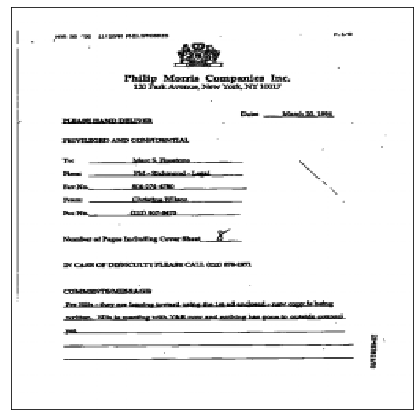

****** Original Image ******* 
 


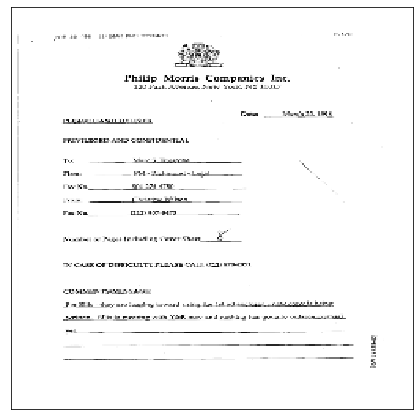

In [0]:
import warnings
warnings.filterwarnings("ignore")
image = df.loc[41278]['image']
path = ("/content/data/images/" + image)
img = cv2.imread(path)
print("****** Pre-processed Image ******\n")
preprocessing(img)
print("****** Original Image ******* \n ")
img= cv2.resize(img, (256, 256))
plt.figure(figsize=(14,7.4))
plt.grid()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()



In [0]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocessing)
test_datagen = ImageDataGenerator(preprocessing_function = preprocessing)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocessing)


train_data = train_datagen.flow_from_directory('data/train/',target_size=(256, 256),batch_size = 16)

test_data = test_datagen.flow_from_directory('data/test/',target_size=(256, 256),batch_size = 16)

validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(256, 256),batch_size = 16)

Found 319837 images belonging to 16 classes.
Found 39997 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


## <font color = 'green'> <b>TRAINING METHDOLOGY </b></font>

### <font color ='green'> <b>INITIALIZATION OF WEIGHTS </b></font>

*   <font color = 'green' ><b> WEIGHTS FROM IMAGE-NET </b> </font>



In [0]:
# Parameters
import warnings
warnings.filterwarnings("ignore")
img_width, img_height = 256, 256
model = VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

In [0]:
for layer in model.layers:
    layer.trainable=False  
model.layers[-2].trainable=True
model.layers[-3].trainable=True      

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_holistic = Model(input = model.input, output = predictions)

# compile the model 
model_holistic.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

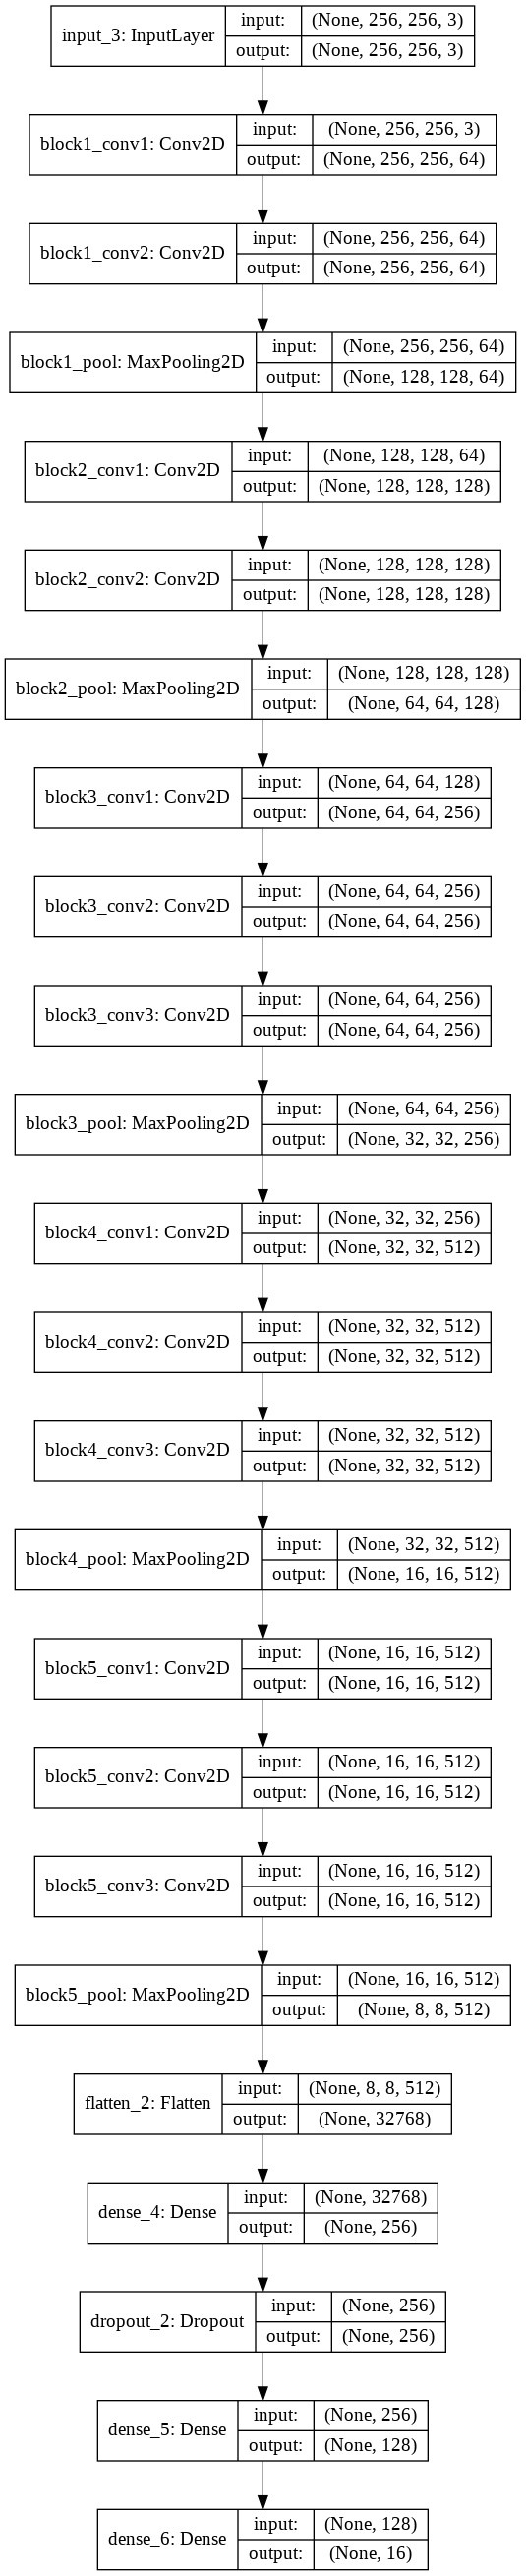

In [0]:
from keras.utils import plot_model
import pydot_ng as pydot
plot_model(model_holistic, show_shapes=True, show_layer_names=True, to_file='model_holistic.png')
from IPython.display import Image
Image(retina=True, filename='model_holistic.png')

In [0]:
#Callbacks

reduce_learning = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001)
model_save = ModelCheckpoint('model_holistic.h5', save_best_only=True, monitor='acc', mode='max')

In [0]:
history = model_holistic.fit_generator(
train_data,
steps_per_epoch =319837/128,
epochs = 5,    
validation_data=validation_data,
validation_steps=39995/128,
callbacks=[reduce_learning,model_save])

Epoch 1/5
2499/2498 [==============================] - 625s 250ms/step - loss: 1.3371 - acc: 0.5945 - val_loss: 0.8953 - val_acc: 0.7344
Epoch 2/5
2499/2498 [==============================] - 614s 246ms/step - loss: 0.9232 - acc: 0.7279 - val_loss: 0.7403 - val_acc: 0.7813
Epoch 3/5
2499/2498 [==============================] - 619s 248ms/step - loss: 0.8112 - acc: 0.7616 - val_loss: 0.6879 - val_acc: 0.7971
Epoch 4/5
2499/2498 [==============================] - 619s 248ms/step - loss: 0.7396 - acc: 0.7830 - val_loss: 0.6108 - val_acc: 0.8189
Epoch 5/5
2499/2498 [==============================] - 620s 248ms/step - loss: 0.7111 - acc: 0.7932 - val_loss: 0.5772 - val_acc: 0.8273


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
weights_file = drive.CreateFile({'title' : '/content/model_holistic.h5'})
weights_file.SetContentFile('/content/model_holistic.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1I_JrBquPt0pRvrLhVs2jVKy1KdKmlCvX'})

In [0]:
# Analysing Results
validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(256,256),batch_size=16,shuffle = False)
class_labels = validation_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


#Confution Matrix and Classification Report
Y_pred = model_holistic.predict_generator(validation_data, 39995//16+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_data.classes, y_pred, target_names=target_names))



Found 39995 images belonging to 16 classes.
Classification Report
                        precision    recall  f1-score   support

         advertisement       0.88      0.88      0.88      2522
                budget       0.82      0.74      0.78      2485
                 email       0.97      0.96      0.97      2530
           file folder       0.83      0.95      0.89      2451
                  form       0.69      0.66      0.68      2537
           handwritten       0.93      0.91      0.92      2434
               invoice       0.83      0.81      0.82      2576
                letter       0.79      0.85      0.82      2430
                  memo       0.88      0.84      0.86      2533
          news article       0.84      0.84      0.84      2526
          presentation       0.66      0.80      0.72      2468
         questionnaire       0.74      0.74      0.74      2516
                resume       0.93      0.88      0.90      2424
scientific publication       0.89    

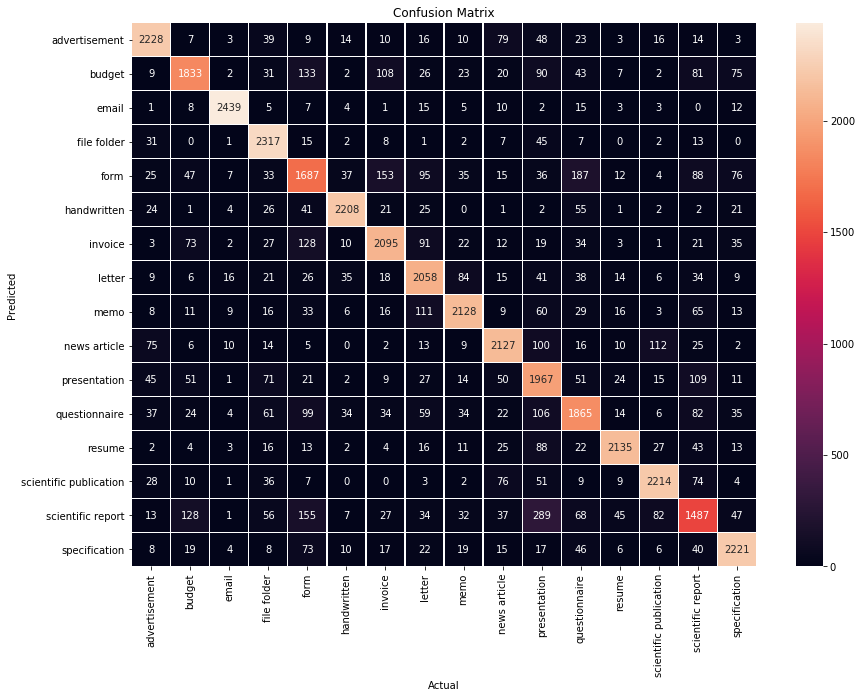

In [0]:
import matplotlib.pyplot as plt

scores = confusion_matrix(validation_data.classes, y_pred)
plt.figure(figsize=(14, 10))
ax = sns.heatmap(scores, linewidths=.3, fmt='.4g',annot=True,
                  xticklabels = classes,
                  yticklabels = classes)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.show()

# <font color = 'green'> <b> BODY RIGHT PART CNN </b> </font> 

In [0]:
from skimage import exposure, color
    
def preprocessingrightpartbody(img, Nr = 780, Nc = 600):
    """
      This function applies the three preprocessing
      techniques,
      - ApproxVision
      - Histogram Equalization
      - Normalization and Resizing with cubic spline interpolation 
    """
    ### A generic dimension for all the images ###
    img = cv2.resize(img, (Nr, Nc), interpolation=cv2.INTER_AREA)
    #ApproxVision   
    for i in img:
      for j in i:
        for k in range(len(j)):
          count = 0
          lsb = int(j[k])
          for counter in range(4):
            if((lsb & 0x1) == 1):
              lsb = lsb >> 1
              count = count + 1
          if(count > 2):
            j[k] = int(j[k]) | 0xF;
          else:
            j[k] = int(j[k]) & 0xF0;
    #########################################
    ###### Histogram Equalization ###########
    img = exposure.equalize_hist(img)
    ################################################
    ######## Extract Body Right part pixels ######### 
    img = img[ 256 : -256]
    img = img[ : ,240 : ]
    ################################################
    # Guasssian Blur
    img = cv2.GaussianBlur(img, (1, 1), 0) 
    # Resizing with nearest-neighbour interpolation to retain amplitude dynamic
    img = cv2.resize(img, (227, 227), interpolation=cv2.INTER_AREA)
#     plt.figure(figsize=(14,7.4))
#     plt.grid()
#     plt.imshow(img)
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()
    return img

##### <b>Testing the Preprocessing function</b>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


****** Pre-processed Image ******



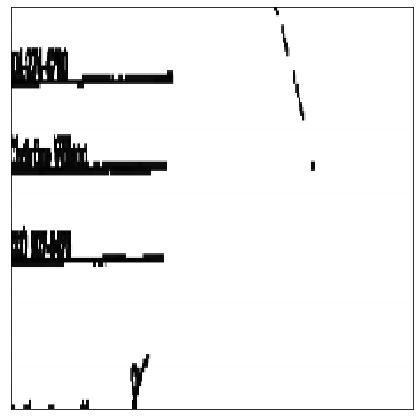

****** Original Image ******* 
 


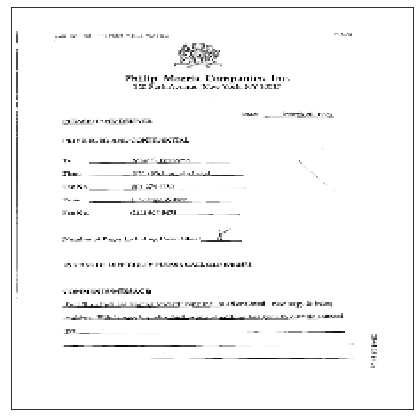

In [0]:
import warnings
warnings.filterwarnings("ignore")
image = df.loc[41278]['image']
path = ("/content/data/images/" + image)
img = cv2.imread(path)
print("****** Pre-processed Image ******\n")
preprocessing(img)
print("****** Original Image ******* \n ")
img= cv2.resize(img, (227, 227))
plt.figure(figsize=(14,7.4))
plt.grid()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()



In [0]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocessing)
test_datagen = ImageDataGenerator(preprocessing_function = preprocessing)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocessing)


train_data = train_datagen.flow_from_directory('data/train/',target_size=(227, 227),batch_size = 16)

test_data = test_datagen.flow_from_directory('data/test/',target_size=(227, 227),batch_size = 16)

validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(227, 227),batch_size = 16)

Found 319837 images belonging to 16 classes.
Found 39997 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


## <font color = 'green'> <b>TRAINING METHODOLOGY </b></font>

### <font color ='green'> <b>INITIALIZATION OF WEIGHTS </b></font>

*   <font color = 'green' ><b> WEIGHTS FROM IMAGE-NET </b> </font>



In [0]:
# Parameters
import warnings
warnings.filterwarnings("ignore")
img_width, img_height = 227, 227
model = VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

In [0]:
for layer in model.layers:
    layer.trainable=False  
model.layers[-2].trainable=True
model.layers[-3].trainable=True      

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_rightbody = Model(input = model.input, output = predictions)

# compile the model 
model_rightbody.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

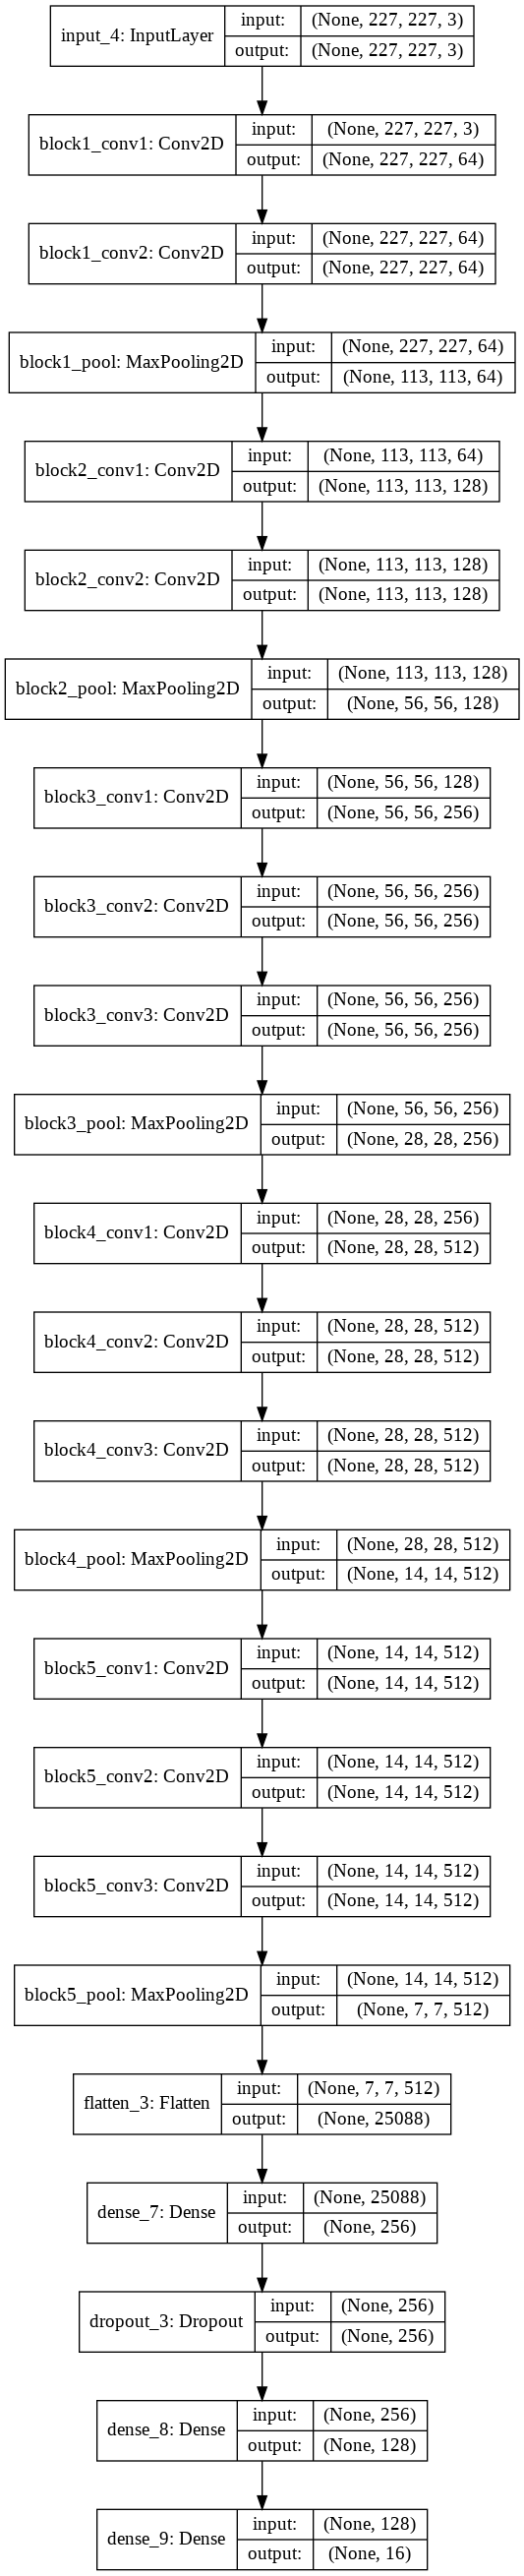

In [0]:
from keras.utils import plot_model
import pydot_ng as pydot
plot_model(model_rightbody, show_shapes=True, show_layer_names=True, to_file='model_rightbody.png')
from IPython.display import Image
Image(retina=True, filename='model_rightbody.png')

In [0]:
#Callbacks

reduce_learning = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001)
model_save = ModelCheckpoint('model_rightbody.h5', save_best_only=True, monitor='acc', mode='max')

In [0]:
history = model_rightbody.fit_generator(
train_data,
steps_per_epoch =319837/128,
epochs = 5,    
validation_data=validation_data,
validation_steps=39995/128,
callbacks=[reduce_learning,model_save])

2499/2498 [==============================] - 1898s 760ms/step - loss: 1.6993 - acc: 0.4843 - val_loss: 1.5984 - val_acc: 0.5222
Epoch 3/5
2499/2498 [==============================] - 1827s 731ms/step - loss: 1.6060 - acc: 0.5133 - val_loss: 1.4902 - val_acc: 0.5533
Epoch 4/5
2499/2498 [==============================] - 1926s 771ms/step - loss: 1.5562 - acc: 0.5306 - val_loss: 1.4809 - val_acc: 0.5471
Epoch 5/5
2499/2498 [==============================] - 2014s 806ms/step - loss: 1.5095 - acc: 0.5433 - val_loss: 1.3709 - val_acc: 0.5749


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
weights_file = drive.CreateFile({'title' : '/content/model_rightbody.h5'})
weights_file.SetContentFile('/content/model_rightbody.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1bGjdcf3a-iZ9mUmLs8D1K12Q0mJVWM9J'})

In [0]:
# Analysing Results
validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(227,227),batch_size=16,shuffle = False)
class_labels = validation_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


#Confution Matrix and Classification Report
Y_pred = model_rightbody.predict_generator(validation_data, 39995//16+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_data.classes, y_pred, target_names=target_names))



Found 39995 images belonging to 16 classes.
Classification Report
                        precision    recall  f1-score   support

         advertisement       0.73      0.76      0.74      2522
                budget       0.55      0.48      0.51      2485
                 email       0.56      0.74      0.64      2530
           file folder       0.58      0.75      0.65      2451
                  form       0.49      0.33      0.40      2537
           handwritten       0.70      0.76      0.73      2434
               invoice       0.51      0.53      0.52      2576
                letter       0.37      0.55      0.44      2430
                  memo       0.38      0.27      0.31      2533
          news article       0.72      0.64      0.68      2526
          presentation       0.54      0.50      0.52      2468
         questionnaire       0.59      0.45      0.51      2516
                resume       0.62      0.69      0.65      2424
scientific publication       0.77    

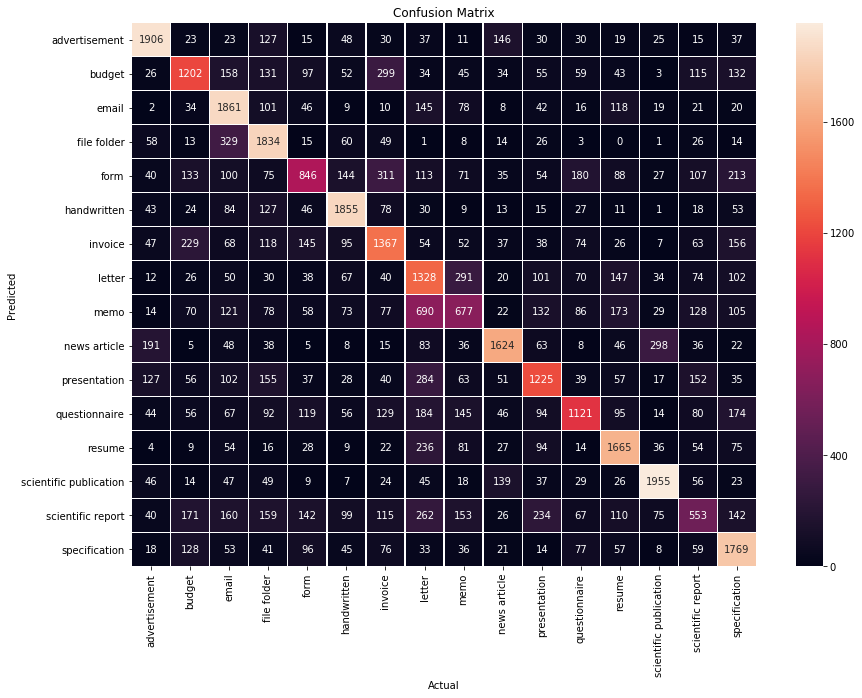

In [0]:
import matplotlib.pyplot as plt

scores = confusion_matrix(validation_data.classes, y_pred)
plt.figure(figsize=(14, 10))
ax = sns.heatmap(scores, linewidths=.3, fmt='.4g',annot=True,
                  xticklabels = classes,
                  yticklabels = classes)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.show()

# <font color = 'green'> <b> HEADER CNN </b> </font> 

In [0]:
from skimage import exposure, color
    
def preprocessing_header(img, Nr = 780, Nc = 600):
    """
      This function applies the three preprocessing
      techniques,
      - ApproxVision
      - Histogram Equalization
      - Normalization and Resizing with cubic spline interpolation 
    """
    ### A generic dimension for all the images ###
    img = cv2.resize(img, (Nr, Nc), interpolation=cv2.INTER_AREA)
    #ApproxVision   
    for i in img:
      for j in i:
        for k in range(len(j)):
          count = 0
          lsb = int(j[k])
          for counter in range(4):
            if((lsb & 0x1) == 1):
              lsb = lsb >> 1
              count = count + 1
          if(count > 2):
            j[k] = int(j[k]) | 0xF;
          else:
            j[k] = int(j[k]) & 0xF0;
    #########################################
    ###### Histogram Equalization ###########
    img = exposure.equalize_hist(img)
    #######################################################
    ######## Extract Top 256 pixel as Header part ######### 
    img = img[ : 256]
    #######################################################
    # Guasssian Blur
    img = cv2.GaussianBlur(img, (1, 1), 0) 
    # Resizing with nearest-neighbour interpolation to retain amplitude dynamic
    img = cv2.resize(img, (227, 227), interpolation=cv2.INTER_AREA)
#     plt.figure(figsize=(14,7.4))
#     plt.grid()
#     plt.imshow(img)
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()
    return img

##### <b>Testing the Preprocessing function</b>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


****** Pre-processed Image ******



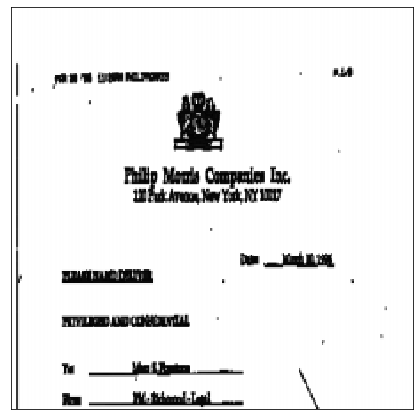

****** Original Image ******* 
 


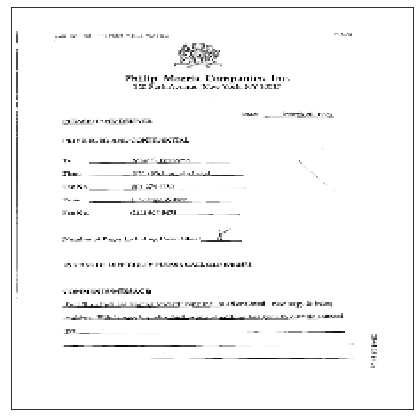

In [0]:
import warnings
warnings.filterwarnings("ignore")
image = df.loc[41278]['image']
path = ("/content/data/images/" + image)
img = cv2.imread(path)
print("****** Pre-processed Image ******\n")
preprocessing(img)
print("****** Original Image ******* \n ")
img= cv2.resize(img, (227, 227))
plt.figure(figsize=(14,7.4))
plt.grid()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()



In [0]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocessing)
test_datagen = ImageDataGenerator(preprocessing_function = preprocessing)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocessing)


train_data = train_datagen.flow_from_directory('data/train/',target_size=(227, 227),batch_size = 16)

test_data = test_datagen.flow_from_directory('data/test/',target_size=(227, 227),batch_size = 16)

validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(227, 227),batch_size = 16)

Found 319837 images belonging to 16 classes.
Found 39997 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


## <font color = 'green'> <b>TRAINING METHODOLOGY </b></font>

### <font color ='green'> <b>INITIALIZATION OF WEIGHTS </b></font>

*   <font color = 'green' ><b> WEIGHTS FROM IMAGE-NET </b> </font>



In [0]:
# Parameters
import warnings
warnings.filterwarnings("ignore")
img_width, img_height = 227, 227
model = VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

In [0]:
for layer in model.layers:
    layer.trainable=False  
model.layers[-2].trainable=True
model.layers[-3].trainable=True      

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_header = Model(input = model.input, output = predictions)

# compile the model 
model_header.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

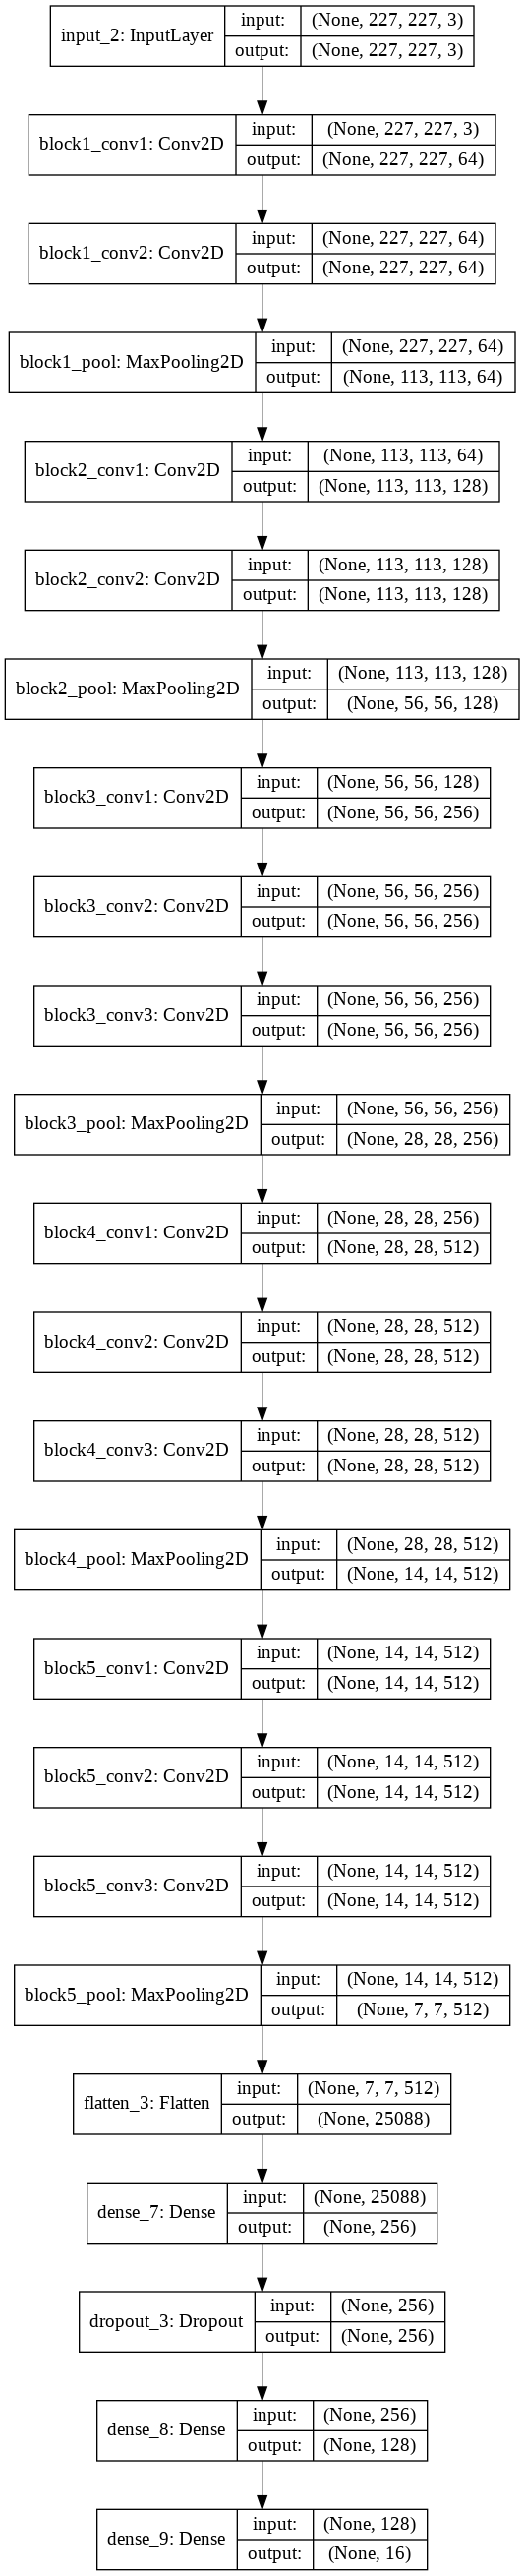

In [0]:
from keras.utils import plot_model
import pydot_ng as pydot
plot_model(model_header, show_shapes=True, show_layer_names=True, to_file='model_header.png')
from IPython.display import Image
Image(retina=True, filename='model_header.png')

In [0]:
#Callbacks

reduce_learning = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001)
model_save = ModelCheckpoint('model_header.h5', save_best_only=True, monitor='acc', mode='max')

In [0]:
history = model_header.fit_generator(
train_data,
steps_per_epoch =319837/128,
epochs = 5,    
validation_data=validation_data,
validation_steps=39995/128,
callbacks=[reduce_learning,model_save])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
2499/2498 [==============================] - 1996s 799ms/step - loss: 1.5654 - acc: 0.5287 - val_loss: 1.1556 - val_acc: 0.6526
Epoch 2/5
1867/2498 [=====================>........] - ETA: 7:31 - loss: 1.2071 - acc: 0.6425WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
2499/2498 [==============================] - 1996s 799ms/step - loss: 1.5654 - acc: 0.5287 - val_loss: 1.1556 - val_acc: 0.6526
Epoch 2/5
2499/2498 [==============================] - 2026s 811ms/step - loss: 1.1906 - acc: 0.6475 - val_loss: 0.9984 - val_acc: 0.7061
Epoch 3/5
2499/2498 [==============================] - 2031s 813ms/step - loss: 1.0540 - acc

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
weights_file = drive.CreateFile({'title' : '/content/model_header.h5'})
weights_file.SetContentFile('/content/model_header.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1qymipDCs_K0bO_hPOkdq7UHxUTbJzEGh'})

In [0]:
# Analysing Results
validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(227,227),batch_size=16,shuffle = False)
class_labels = validation_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


#Confution Matrix and Classification Report
Y_pred = model_header.predict_generator(validation_data, 39995//16+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_data.classes, y_pred, target_names=target_names))



Found 39995 images belonging to 16 classes.
Classification Report
                        precision    recall  f1-score   support

         advertisement       0.84      0.80      0.82      2522
                budget       0.66      0.70      0.68      2485
                 email       0.92      0.92      0.92      2530
           file folder       0.75      0.93      0.83      2451
                  form       0.64      0.55      0.60      2537
           handwritten       0.84      0.91      0.87      2434
               invoice       0.70      0.73      0.71      2576
                letter       0.71      0.78      0.74      2430
                  memo       0.83      0.82      0.82      2533
          news article       0.78      0.74      0.76      2526
          presentation       0.59      0.69      0.64      2468
         questionnaire       0.75      0.60      0.67      2516
                resume       0.92      0.82      0.87      2424
scientific publication       0.87    

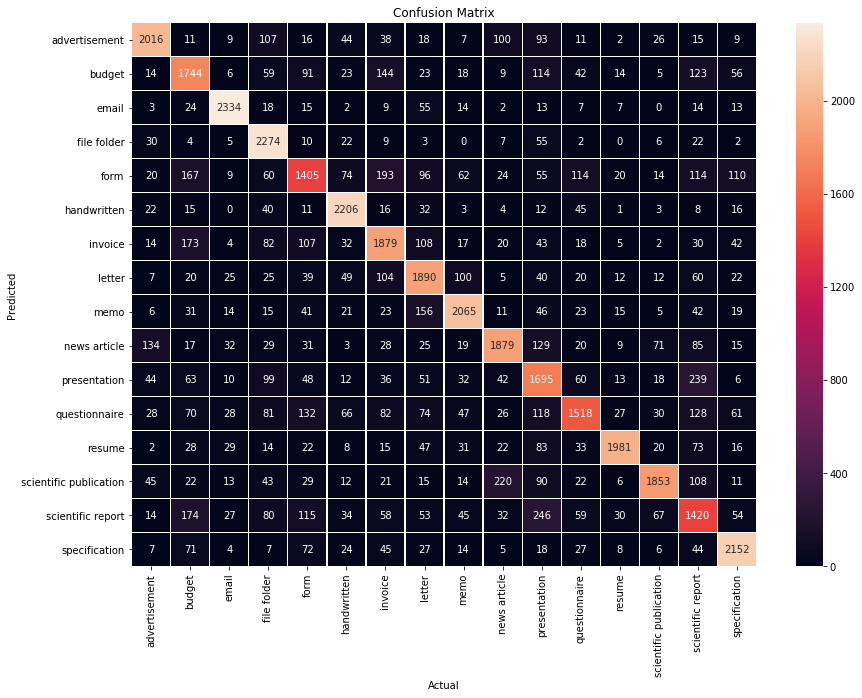

In [0]:
import matplotlib.pyplot as plt

scores = confusion_matrix(validation_data.classes, y_pred)
plt.figure(figsize=(14, 10))
ax = sns.heatmap(scores, linewidths=.3, fmt='.4g',annot=True,
                  xticklabels = classes,
                  yticklabels = classes)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.show()

In [0]:
def CNN_HOLISTIC(Nr = 512, Nc = 512):
  """
  
  This function implements the holistic CNN which
  contains 7 layers
  
  """
  # The model is sequential model 
  model = Sequential()
  # First conv layer
  # CONV
  model.add( Conv2D(96,(11,11),strides = (4,4),
                    padding = 'same',activation = 'relu',
                    input_shape = (Nr, Nc, 3)) )
  # MAXP overlap
  model.add( MaxPooling2D(pool_size = (3,3),strides = 2) )

  # Second conv layer
  # CONV
  model.add( Conv2D(256,(5,5),padding = 'same',activation = 'relu') )
  # MAXP overlap
  model.add( MaxPooling2D(pool_size = (3,3),strides = 2) )

  # Third conv layer
  # CONV
  model.add( Conv2D(384,(3,3),padding = 'same',activation = 'relu') )
  # Fourth conv layer
  # CONV
  model.add( Conv2D(384,(3,3),padding = 'same',activation = 'relu') )

  # Fifth conv layer
  # CONV
  model.add( Conv2D(256,(3,3),padding = 'same',activation = 'relu') )
  # MAXP overlap
  model.add( MaxPooling2D(pool_size = (3,3),strides = 2) )

  # Sixth conv layer
  # CONV
  model.add( Conv2D(256,(2,2),padding = 'same',activation = 'relu') )
  # Seventh conv layer
  # CONV
  model.add( Conv2D(256,(2,2),padding = 'same',activation = 'relu') )
  # MAXP overlap
  model.add( MaxPooling2D(pool_size = (2,2),strides = 2) )

  # First fully connected layer
  model.add( Flatten() )
  model.add( Dense(64, activation = 'relu') )
  # Second fully connected layer
  model.add( Dense(64, activation = 'relu') )
  # Predictions
  model.add( Dense(16, activation = 'softmax') )

  # Model creation
  model.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

  return model

# <font color = 'green'> <b> BODY LEFT PART CNN </b> </font> 

In [0]:
from skimage import exposure, color
    
def preprocessingleftbody(img, Nr = 780, Nc = 600):
    """
      This function applies the three preprocessing
      techniques,
      - ApproxVision
      - Histogram Equalization
      - Normalization and Resizing with cubic spline interpolation 
    """
    ### A generic dimension for all the images ###
    img = cv2.resize(img, (Nr, Nc), interpolation=cv2.INTER_AREA)
    #ApproxVision   
    for i in img:
      for j in i:
        for k in range(len(j)):
          count = 0
          lsb = int(j[k])
          for counter in range(4):
            if((lsb & 0x1) == 1):
              lsb = lsb >> 1
              count = count + 1
          if(count > 2):
            j[k] = int(j[k]) | 0xF;
          else:
            j[k] = int(j[k]) & 0xF0;
    #########################################
    ###### Histogram Equalization ###########
    img = exposure.equalize_hist(img)
    ################################################
    ######## Extract Body left part pixels ######### 
    img = img[ 256 : -256]
    img = img[:,:240]
    ################################################
    # Guasssian Blur
    img = cv2.GaussianBlur(img, (1, 1), 0) 
    # Resizing with nearest-neighbour interpolation to retain amplitude dynamic
    img = cv2.resize(img, (227, 227), interpolation=cv2.INTER_AREA)
#     plt.figure(figsize=(14,7.4))
#     plt.grid()
#     plt.imshow(img)
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()
    return img

##### <b>Testing the Preprocessing function</b>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


****** Pre-processed Image ******



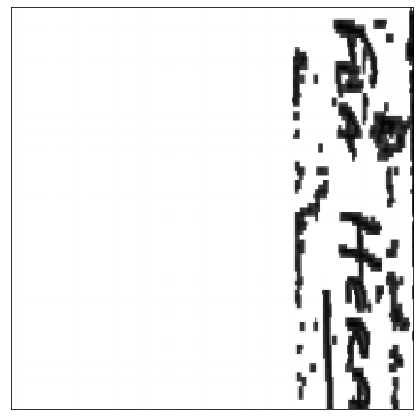

****** Original Image ******* 
 


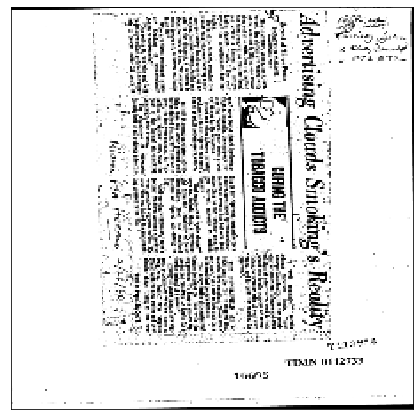

In [0]:
import warnings
warnings.filterwarnings("ignore")
image = df.loc[468]['image']
path = ("/content/data/images/" + image)
img = cv2.imread(path)
print("****** Pre-processed Image ******\n")
preprocessing(img)
print("****** Original Image ******* \n ")
img= cv2.resize(img, (227, 227))
plt.figure(figsize=(14,7.4))
plt.grid()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()



In [0]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocessing)
test_datagen = ImageDataGenerator(preprocessing_function = preprocessing)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocessing)


train_data = train_datagen.flow_from_directory('data/train/',target_size=(227, 227),batch_size = 16)

test_data = test_datagen.flow_from_directory('data/test/',target_size=(227, 227),batch_size = 16)

validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(227, 227),batch_size = 16)

Found 319837 images belonging to 16 classes.
Found 39997 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


## <font color = 'green'> <b>TRAINING METHODOLOGY </b></font>

### <font color ='green'> <b>INITIALIZATION OF WEIGHTS </b></font>

*   <font color = 'green' ><b> WEIGHTS FROM IMAGE-NET </b> </font>



In [0]:
# Parameters
import warnings
warnings.filterwarnings("ignore")
img_width, img_height = 227, 227
model = VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

In [0]:
for layer in model.layers:
    layer.trainable=False  
model.layers[-2].trainable=True
model.layers[-3].trainable=True      

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_leftbody = Model(input = model.input, output = predictions)

# compile the model 
model_leftbody.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

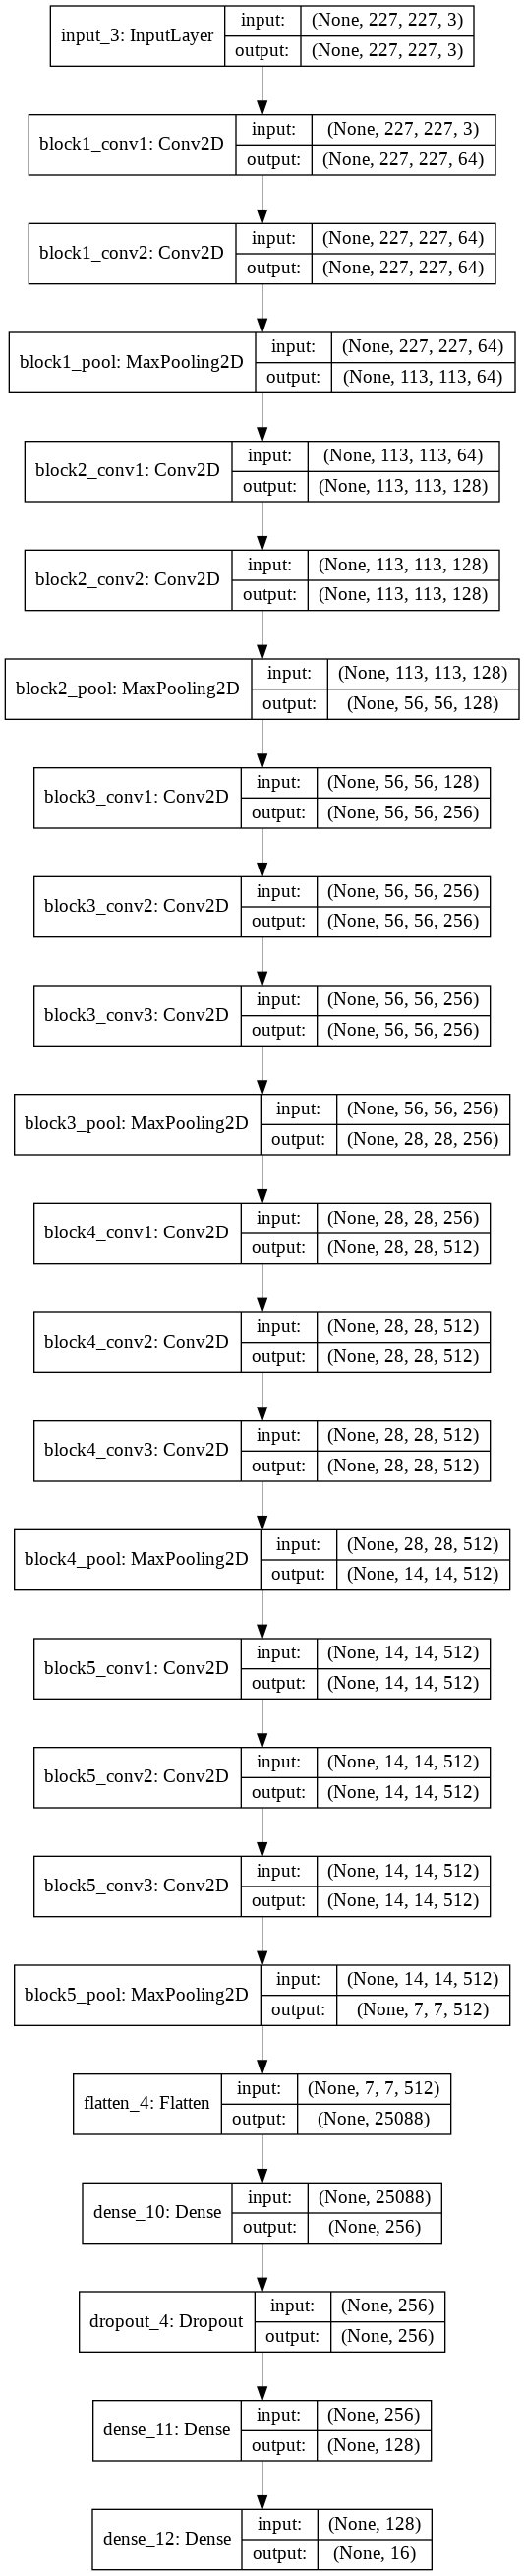

In [0]:
from keras.utils import plot_model
import pydot_ng as pydot
plot_model(model_leftbody, show_shapes=True, show_layer_names=True, to_file='model_leftbody.png')
from IPython.display import Image
Image(retina=True, filename='model_leftbody.png')

In [0]:
#Callbacks

reduce_learning = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001)
model_save = ModelCheckpoint('model_leftbody.h5', save_best_only=True, monitor='acc', mode='max')

In [0]:
history = model_leftbody.fit_generator(
train_data,
steps_per_epoch =319837/128,
epochs = 5,    
validation_data=validation_data,
validation_steps=39995/128,
callbacks=[reduce_learning,model_save])

2499/2498 [==============================] - 1924s 770ms/step - loss: 1.8601 - acc: 0.4239 - val_loss: 1.7490 - val_acc: 0.4577
Epoch 4/5
2499/2498 [==============================] - 1868s 747ms/step - loss: 1.8056 - acc: 0.4401 - val_loss: 1.7156 - val_acc: 0.4627
Epoch 5/5
2499/2498 [==============================] - 1875s 750ms/step - loss: 1.7588 - acc: 0.4534 - val_loss: 1.6725 - val_acc: 0.4798


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
weights_file = drive.CreateFile({'title' : '/content/model_leftbody.h5'})
weights_file.SetContentFile('/content/model_leftbody.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '11Dshz6LM00qn8iHCbN8nLkMm5x2RHQoe'})

In [0]:
# Analysing Results
validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(227,227),batch_size=16,shuffle = False)
class_labels = validation_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


#Confution Matrix and Classification Report
Y_pred = model_leftbody.predict_generator(validation_data, 39995//16+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_data.classes, y_pred, target_names=target_names))



Found 39995 images belonging to 16 classes.
Classification Report
                        precision    recall  f1-score   support

         advertisement       0.64      0.63      0.63      2522
                budget       0.51      0.38      0.43      2485
                 email       0.43      0.66      0.52      2530
           file folder       0.37      0.48      0.42      2451
                  form       0.42      0.29      0.34      2537
           handwritten       0.61      0.73      0.66      2434
               invoice       0.32      0.48      0.38      2576
                letter       0.35      0.48      0.40      2430
                  memo       0.30      0.31      0.31      2533
          news article       0.68      0.41      0.52      2526
          presentation       0.50      0.39      0.43      2468
         questionnaire       0.44      0.42      0.43      2516
                resume       0.61      0.67      0.64      2424
scientific publication       0.71    

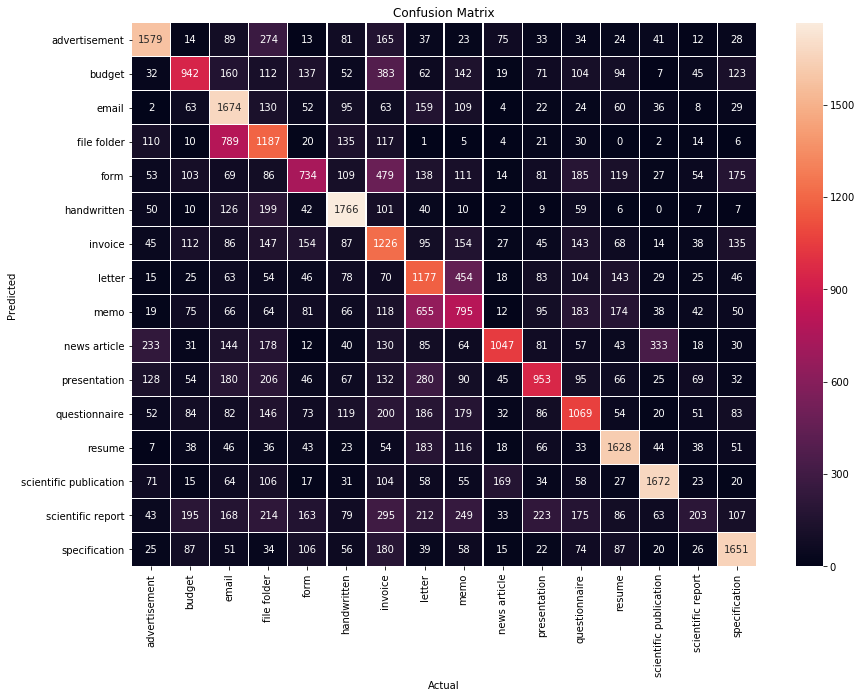

In [0]:
import matplotlib.pyplot as plt

scores = confusion_matrix(validation_data.classes, y_pred)
plt.figure(figsize=(14, 10))
ax = sns.heatmap(scores, linewidths=.3, fmt='.4g',annot=True,
                  xticklabels = classes,
                  yticklabels = classes)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.show()

# <font color = 'green'> <b> FOOTER CNN </b> </font> 

In [0]:
from skimage import exposure, color
    
def preprocessing_footer(img, Nr = 780, Nc = 600):
    """
      This function applies the three preprocessing
      techniques,
      - ApproxVision
      - Histogram Equalization
      - Normalization and Resizing with cubic spline interpolation 
    """
    ### A generic dimension for all the images ###
    img = cv2.resize(img, (Nr, Nc), interpolation=cv2.INTER_AREA)
    #ApproxVision   
    for i in img:
      for j in i:
        for k in range(len(j)):
          count = 0
          lsb = int(j[k])
          for counter in range(4):
            if((lsb & 0x1) == 1):
              lsb = lsb >> 1
              count = count + 1
          if(count > 2):
            j[k] = int(j[k]) | 0xF;
          else:
            j[k] = int(j[k]) & 0xF0;
    #########################################
    ###### Histogram Equalization ###########
    img = exposure.equalize_hist(img)
    #######################################################
    ######## Extract bottom 256 pixel as footer part ######### 
    img = img[ -256 : ]
    #######################################################
    # Guasssian Blur
    img = cv2.GaussianBlur(img, (1, 1), 0) 
    # Resizing with nearest-neighbour interpolation to retain amplitude dynamic
    img = cv2.resize(img, (227, 227), interpolation=cv2.INTER_AREA)
    # plt.figure(figsize=(14,7.4))
    # plt.grid()
    # plt.imshow(img)
    # plt.xticks([])
    # plt.yticks([])
    # plt.show()
    return img

##### <b>Testing the Preprocessing function</b>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


****** Pre-processed Image ******



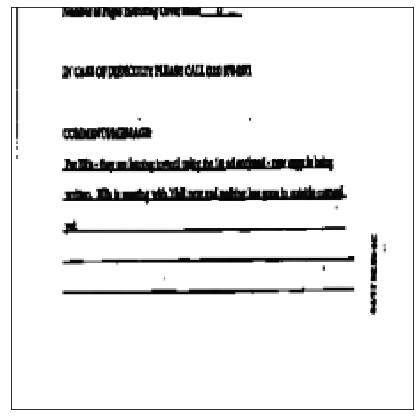

****** Original Image ******* 
 


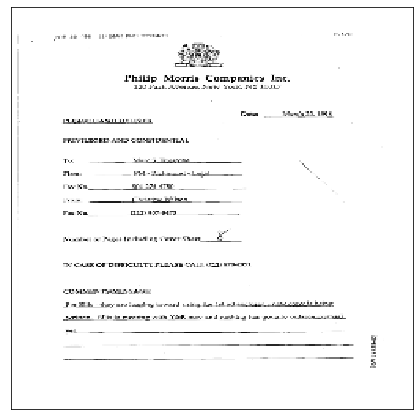

In [0]:
import warnings
warnings.filterwarnings("ignore")
image = df.loc[41278]['image']
path = ("/content/data/images/" + image)
img = cv2.imread(path)
print("****** Pre-processed Image ******\n")
preprocessing(img)
print("****** Original Image ******* \n ")
img= cv2.resize(img, (256, 256))
plt.figure(figsize=(14,7.4))
plt.grid()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()



In [0]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocessing)
test_datagen = ImageDataGenerator(preprocessing_function = preprocessing)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocessing)


train_data = train_datagen.flow_from_directory('data/train/',target_size=(227, 227),batch_size = 16)

test_data = test_datagen.flow_from_directory('data/test/',target_size=(227, 227),batch_size = 16)

validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(227, 227),batch_size = 16)

Found 319837 images belonging to 16 classes.
Found 39997 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


## <font color = 'green'> <b>TRAINING METHDOLOGY </b></font>

### <font color ='green'> <b>INITIALIZATION OF WEIGHTS </b></font>

*   <font color = 'green' ><b> WEIGHTS FROM IMAGE-NET </b> </font>



In [0]:
# Parameters
img_width, img_height = 227, 227
model = VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

In [0]:
for layer in model.layers:
    layer.trainable=False  
model.layers[-2].trainable=True
model.layers[-3].trainable=True      

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_footer = Model(input = model.input, output = predictions)

# compile the model 
model_footer.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

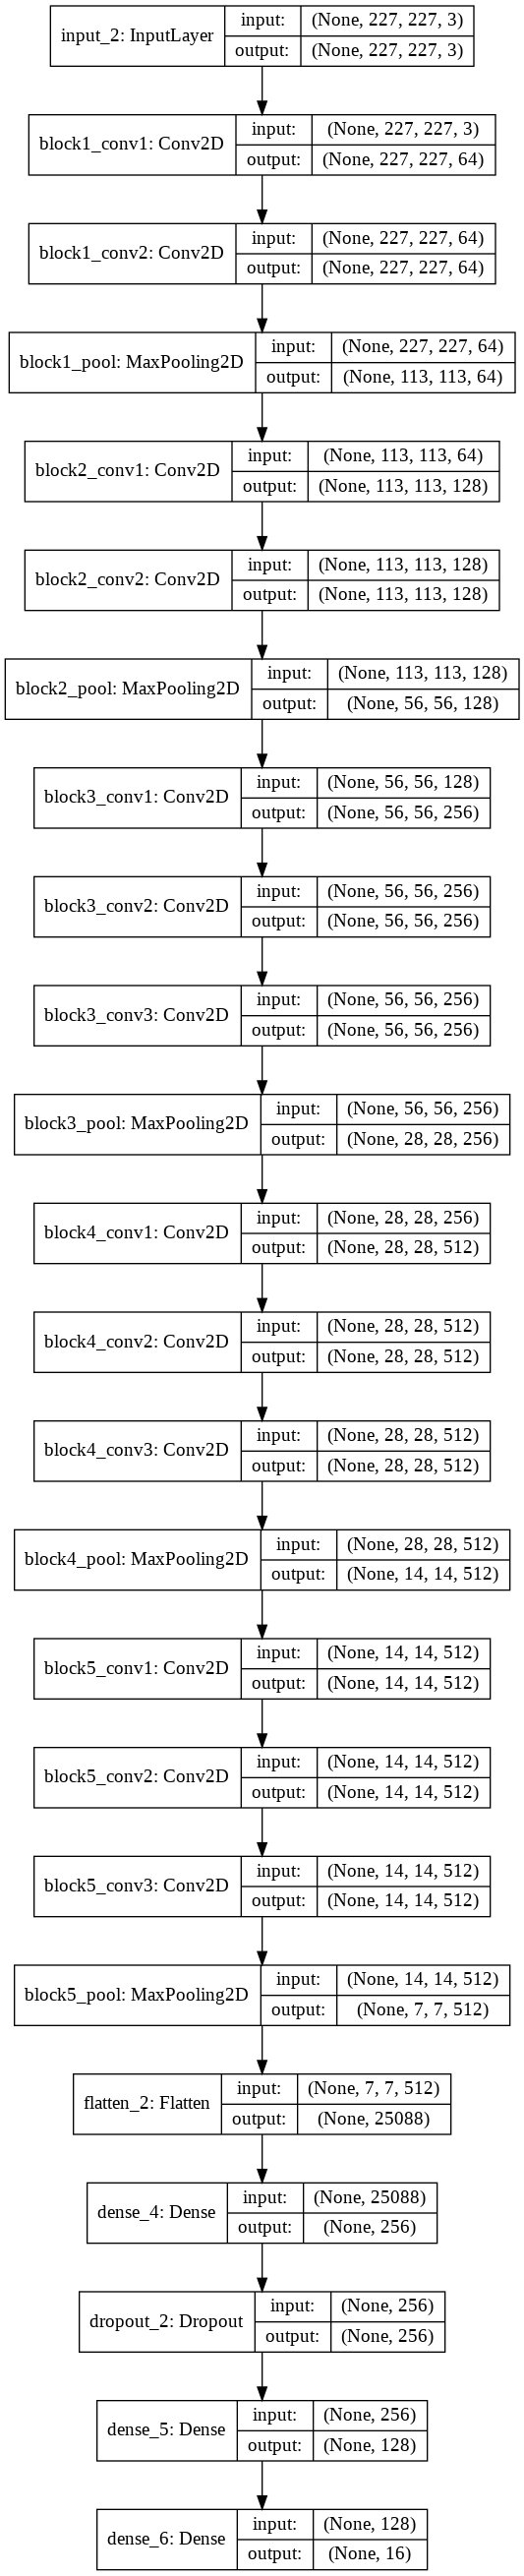

In [0]:
from keras.utils import plot_model
import pydot_ng as pydot
plot_model(model_footer, show_shapes=True, show_layer_names=True, to_file='model_footer.png')
from IPython.display import Image
Image(retina=True, filename='model_footer.png')

In [0]:
#Callbacks

reduce_learning = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001)
model_save = ModelCheckpoint('model_footer.h5', save_best_only=True, monitor='acc', mode='max')

In [0]:
history = model_footer.fit_generator(
train_data,
steps_per_epoch =319837/128,
epochs = 5,    
validation_data=validation_data,
validation_steps=39995/128,
callbacks=[reduce_learning,model_save])

Epoch 1/5
2499/2498 [==============================] - 2427s 971ms/step - loss: 1.6537 - acc: 0.4947 - val_loss: 1.2816 - val_acc: 0.6068
Epoch 2/5
2499/2498 [==============================] - 2390s 957ms/step - loss: 1.2786 - acc: 0.6159 - val_loss: 1.1117 - val_acc: 0.6579
Epoch 3/5
2499/2498 [==============================] - 2380s 953ms/step - loss: 1.1652 - acc: 0.6499 - val_loss: 1.0286 - val_acc: 0.6811
Epoch 4/5
2499/2498 [==============================] - 2416s 967ms/step - loss: 1.1015 - acc: 0.6678 - val_loss: 0.9699 - val_acc: 0.7059
Epoch 5/5
2499/2498 [==============================] - 2379s 952ms/step - loss: 1.0571 - acc: 0.6811 - val_loss: 0.9827 - val_acc: 0.6959


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
weights_file = drive.CreateFile({'title' : '/content/model_footer.h5'})
weights_file.SetContentFile('/content/model_footer.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1hYMPWCkMTKH9lQkGzyccYM3jQlzH3OEF'})

In [0]:
# Analysing Results
validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(256,256),batch_size=32,shuffle = False)
class_labels = validation_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


#Confution Matrix and Classification Report
Y_pred = model_footer.predict_generator(validation_data, 39995//32+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_data.classes, y_pred, target_names=target_names))



In [0]:
import matplotlib.pyplot as plt

scores = confusion_matrix(validation_data.classes, y_pred)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(scores, linewidths=.3, fmt='.4g',annot=True,
                  xticklabels = classes,
                  yticklabels = classes)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.show()

#<font color='green'> <b> FEATURE EXTRACTION - HOLISTIC MODEL</b> </font>

In [0]:
# Loading the weights for the holistic model
import warnings
warnings.filterwarnings("ignore")
from keras.models import load_model
model_holistic = load_model('/content/drive/My Drive/model_holistic.h5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
model_holistic.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [0]:
model_holistic.optimizer

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocessing_holistic)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocessing_holistic)
test_datagen = ImageDataGenerator(preprocessing_function = preprocessing_holistic)


In [0]:
train_data = train_datagen.flow_from_directory('data/train/',target_size=(256, 256),batch_size = 1, shuffle=False)

test_data = test_datagen.flow_from_directory('data/test/',target_size=(256, 256),batch_size = 1, shuffle=False)

validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(256, 256),batch_size = 1, shuffle=False)

Found 319837 images belonging to 16 classes.
Found 39996 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


In [0]:
%%time
features_train_holistic = model_holistic.predict_generator(train_data,steps = 319837)


CPU times: user 1h 6min 59s, sys: 6min 6s, total: 1h 13min 6s
Wall time: 1h 9min 7s


In [0]:
%%time
features_valid_holistic = model_holistic.predict_generator(validation_data,steps = 39995)

CPU times: user 8min 24s, sys: 42.3 s, total: 9min 6s
Wall time: 8min 11s


In [0]:
%%time
features_test_holistic = model_holistic.predict_generator(test_data,steps = 39996)


CPU times: user 8min 40s, sys: 43 s, total: 9min 23s
Wall time: 7min 24s


In [0]:
print(features_train_holistic[0])

[0.39765918 0.00790722 0.0011714  0.01208258 0.0139065  0.00224992
 0.00153056 0.00305587 0.00336164 0.21056166 0.25141874 0.02724498
 0.0051189  0.02215132 0.03595811 0.00462139]


In [0]:
import joblib
joblib.dump(features_train_holistic,'features_train_holistic')
weights_file = drive.CreateFile({'title' : '/content/features_train_holistic'})
weights_file.SetContentFile('/content/features_train_holistic')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '14kmAlwwW2-9_snxtXCUEKn8YXbA_NnBZ'})

In [0]:
joblib.dump(features_test_holistic,'features_test_holistic')
weights_file = drive.CreateFile({'title' : '/content/features_test_holistic'})
weights_file.SetContentFile('/content/features_test_holistic')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1RTgh8imIc7k0UUG_ibSO_wFhnnoN5hbO'})

In [0]:
joblib.dump(features_valid_holistic,'features_valid_holistic')
weights_file = drive.CreateFile({'title' : '/content/features_valid_holistic'})
weights_file.SetContentFile('/content/features_valid_holistic')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '19jFaaqMZLo7BlIBkaOVYgRv-uQwBn79W'})

#<font color='green'> <b> FEATURE EXTRACTION - LEFT BODY MODEL</b> </font>

In [0]:
# Loading the weights for the holistic model
model_leftbody = load_model('/content/drive/My Drive/model_leftbody.h5')

In [0]:
model_leftbody.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 227, 227, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 227, 227, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
model_leftbody.optimizer

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocessingleftbody)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocessingleftbody)
test_datagen = ImageDataGenerator(preprocessing_function = preprocessingleftbody)


In [0]:
train_data = train_datagen.flow_from_directory('data/train/',target_size=(227, 227),batch_size = 1, shuffle=False)

test_data = test_datagen.flow_from_directory('data/test/',target_size=(227, 227),batch_size = 1, shuffle=False)

validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(227, 227),batch_size = 1, shuffle=False)

Found 319837 images belonging to 16 classes.
Found 39996 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


In [0]:
%%time
features_train_leftbody = model_leftbody.predict_generator(train_data,steps = 319837)


CPU times: user 3h 30min 11s, sys: 22min 7s, total: 3h 52min 18s
Wall time: 3h 35min 12s


In [0]:
%%time
features_valid_leftbody = model_leftbody.predict_generator(validation_data,steps = 39995)

CPU times: user 27min 7s, sys: 1min 41s, total: 28min 49s
Wall time: 26min 4s


In [0]:
%%time
features_test_leftbody = model_leftbody.predict_generator(test_data,steps = 39996)


CPU times: user 27min 49s, sys: 1min 44s, total: 29min 33s
Wall time: 26min 44s


In [0]:
print(features_train_leftbody[0])

[0.41534272 0.0256162  0.00605633 0.07086682 0.02734175 0.05439724
 0.04496907 0.03449278 0.01329295 0.1182643  0.06556752 0.04961735
 0.00769753 0.0260318  0.02422428 0.01622141]


In [0]:
import joblib
joblib.dump(features_train_leftbody,'features_train_leftbody')
weights_file = drive.CreateFile({'title' : '/content/features_train_leftbody'})
weights_file.SetContentFile('/content/features_train_leftbody')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1FftK0YLhnKZq1WIE0Stz0KtD-pSoSjxz'})

In [0]:
joblib.dump(features_test_leftbody,'features_test_leftbody')
weights_file = drive.CreateFile({'title' : '/content/features_test_leftbody'})
weights_file.SetContentFile('/content/features_test_leftbody')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1vl8R85oix-CAhO1WTzGOYeuPV1Fqbh1Z'})

In [0]:
joblib.dump(features_valid_leftbody,'features_valid_leftbody')
weights_file = drive.CreateFile({'title' : '/content/features_valid_leftbody'})
weights_file.SetContentFile('/content/features_valid_leftbody')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '17swFEGN8_3aC0vHl62mghsdwd7yvWKn8'})

#<font color='green'> <b> FEATURE EXTRACTION - HEADER</b> </font>

In [0]:
# Loading the weights for the holistic model
model_header = load_model('/content/drive/My Drive/model_header.h5')

In [0]:
model_header.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 227, 227, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 227, 227, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
model_header.optimizer

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocessing_header)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocessing_header)
test_datagen = ImageDataGenerator(preprocessing_function = preprocessing_header)


In [0]:
train_data = train_datagen.flow_from_directory('data/train/',target_size=(227, 227),batch_size = 1, shuffle=False)

test_data = test_datagen.flow_from_directory('data/test/',target_size=(227, 227),batch_size = 1, shuffle=False)

validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(227, 227),batch_size = 1, shuffle=False)

Found 319837 images belonging to 16 classes.
Found 39996 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


In [0]:
%%time
features_train_header = model_header.predict_generator(train_data,steps = 319837)


/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


CPU times: user 4h 59min 16s, sys: 27min 52s, total: 5h 27min 8s
Wall time: 5h 1s
CPU times: user 4h 59min 16s, sys: 27min 52s, total: 5h 27min 8s
Wall time: 5h 1s


In [0]:
%%time
import warnings
warnings.filterwarnings("ignore")
features_valid_header = model_header.predict_generator(validation_data,steps = 39995)

CPU times: user 38min 48s, sys: 3min 12s, total: 42min 1s
Wall time: 37min 40s


In [0]:
%%time
features_test_header = model_header.predict_generator(test_data,steps = 39996)


CPU times: user 31min 41s, sys: 7min 48s, total: 39min 29s
Wall time: 34min 51s


In [0]:
print(features_train_header[0])

In [0]:
import joblib
joblib.dump(features_train_header,'features_train_header')
weights_file = drive.CreateFile({'title' : '/content/features_train_header'})
weights_file.SetContentFile('/content/features_train_header')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1VejynHpOfyO_7-cO5snHqPwj_FGQQyhr'})

In [0]:
joblib.dump(features_test_header,'features_test_header')
weights_file = drive.CreateFile({'title' : '/content/features_test_header'})
weights_file.SetContentFile('/content/features_test_header')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '18vyFchPHhgcHmh97RVo3udas3HXST8Q-'})

In [0]:
joblib.dump(features_valid_header,'features_valid_header')
weights_file = drive.CreateFile({'title' : '/content/features_valid_header'})
weights_file.SetContentFile('/content/features_valid_header')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1ok_0A1oVVWlWlxmwSmIg9SP3sGz00mLS'})

#<font color='green'> <b> FEATURE EXTRACTION - FOOTER</b> </font>

In [0]:
# Loading the weights for the holistic model
import warnings
warnings.filterwarnings("ignore")
model_footer = load_model('/content/drive/My Drive/model_footer.h5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
model_footer.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 227, 227, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 227, 227, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
model_footer.optimizer

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocessing_footer)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocessing_footer)
test_datagen = ImageDataGenerator(preprocessing_function = preprocessing_footer)


In [0]:
train_data = train_datagen.flow_from_directory('data/train/',target_size=(227, 227),batch_size = 1, shuffle=False)

test_data = test_datagen.flow_from_directory('data/test/',target_size=(227, 227),batch_size = 1, shuffle=False)

validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(227, 227),batch_size = 1, shuffle=False)

Found 319837 images belonging to 16 classes.
Found 39996 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


In [0]:
%%time
features_train_footer = model_footer.predict_generator(train_data,steps = 319837)


CPU times: user 3h 53min 55s, sys: 22min 40s, total: 4h 16min 35s
Wall time: 3h 58min 8s


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
%%time

features_valid_footer = model_footer.predict_generator(validation_data,steps = 39995)

CPU times: user 29min 2s, sys: 1min 57s, total: 31min
Wall time: 28min 7s


In [0]:
%%time
features_test_footer = model_footer.predict_generator(test_data,steps = 39996)


CPU times: user 30min 20s, sys: 2min 11s, total: 32min 31s
Wall time: 29min 29s


In [0]:
print(features_train_footer[0])

[7.3245758e-01 5.3121955e-03 7.1313145e-04 3.9973177e-02 3.9056316e-03
 1.4721860e-02 1.1066879e-02 3.0283150e-03 3.6484376e-03 4.6674721e-02
 9.2239939e-02 5.5717728e-03 2.4267195e-03 2.0258054e-02 1.6066642e-02
 1.9349126e-03]


In [0]:
import joblib
joblib.dump(features_train_footer,'features_train_footer')
weights_file = drive.CreateFile({'title' : '/content/features_train_footer'})
weights_file.SetContentFile('/content/features_train_footer')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '11cyvr0FTd01P-eK8eiRTH8dm24qL3jUG'})

In [0]:
joblib.dump(features_test_footer,'features_test_footer')
weights_file = drive.CreateFile({'title' : '/content/features_test_footer'})
weights_file.SetContentFile('/content/features_test_footer')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1O2w7nua74zO9_tr13Nhc6QG8GTtDpJyy'})

In [0]:
joblib.dump(features_valid_footer,'features_valid_footer')
weights_file = drive.CreateFile({'title' : '/content/features_valid_footer'})
weights_file.SetContentFile('/content/features_valid_footer')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1Oa0uDXXcO5NpTOgtUoKpXHv2T7j7DKYr'})

#<font color='green'> <b> FEATURE EXTRACTION - Right Body MODEL</b> </font>

In [0]:
# Loading the weights for the holistic model
import warnings
warnings.filterwarnings("ignore")
from keras.models import load_model
model_rightbody = load_model('/content/drive/My Drive/model_rightbody.h5')

In [0]:
model_rightbody.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 227, 227, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 227, 227, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 113, 113, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 113, 113, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 113, 113, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
model_rightbody.optimizer

In [0]:
preprocessing_holistic

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocessingrightpartbody)
test_datagen = ImageDataGenerator(preprocessing_function = preprocessingrightpartbody)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocessingrightpartbody)


train_data = train_datagen.flow_from_directory('data/train/',target_size=(227, 227),batch_size = 1, shuffle=False)

test_data = test_datagen.flow_from_directory('data/test/',target_size=(227, 227),batch_size = 1, shuffle=False)

validation_data = validation_datagen.flow_from_directory('data/validation/',target_size=(227, 227),batch_size = 1, shuffle=False)

Found 319837 images belonging to 16 classes.
Found 39996 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.


In [0]:
%%time
features_train_rightbody = model_rightbody.predict_generator(train_data,steps = 319837)


CPU times: user 4h 42min 8s, sys: 27min 9s, total: 5h 9min 17s
Wall time: 4h 44min 3s


In [0]:
%%time
features_valid_rightbody = model_rightbody.predict_generator(validation_data,steps = 39995)

CPU times: user 34min 40s, sys: 2min 27s, total: 37min 7s
Wall time: 33min 30s


In [0]:
%%time
features_test_rightbody = model_rightbody.predict_generator(test_data,steps = 39996)


CPU times: user 36min 8s, sys: 2min 39s, total: 38min 48s
Wall time: 33min 39s


In [0]:
import joblib
joblib.dump(features_train_rightbody,'features_train_rightbody')
weights_file = drive.CreateFile({'title' : '/content/features_train_rightbody'})
weights_file.SetContentFile('/content/features_train_rightbody')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1_AgLXI6BTG_dqqU6MHnfTxy7IIOowMdi'})

In [0]:
joblib.dump(features_test_rightbody,'features_test_rightbody')
weights_file = drive.CreateFile({'title' : '/content/features_test_rightbody'})
weights_file.SetContentFile('/content/features_test_rightbody')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1XbCG8ZlNq-ZEejA32AX1IM9q18HYfiZZ'})

In [0]:
joblib.dump(features_valid_rightbody,'features_valid_rightbody')
weights_file = drive.CreateFile({'title' : '/content/features_valid_rightbody'})
weights_file.SetContentFile('/content/features_valid_rightbody')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1eJBRykrhBg8yIEpnRrFQNKP2W3qKwUcF'})